In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import numpy as np

In [42]:
df.index

DatetimeIndex(['2016-05-09', '2016-05-10', '2016-05-11', '2016-05-12',
               '2016-05-13', '2016-05-14', '2016-05-15', '2016-05-16',
               '2016-05-17', '2016-05-18',
               ...
               '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27',
               '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01',
               '2019-12-02', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1304, freq=None)

In [40]:
#df=pd.read_csv('fcc-forum-pageviews.csv')
#df.columns
#df['value'].describe().round(2)
df=pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'],index_col='date')
df


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [41]:
df['date']=pd.DatetimeIndex(df['date'])
#df.set_index(df['date'])
df

KeyError: 'date'

In [ ]:
#how do i clean the data?
df=df[
    (df['value'] >= (df['value'].quantile(0.025))) & #this takes into account the row which aren't in the bottom part
    (df['value'] <= (df['value'].quantile(0.975))) # and this other statement the ones thar aren't in the top part

]
df.describe().round(2) #to check if the numbers of rows changed
df

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


NameError: name 'y' is not defined

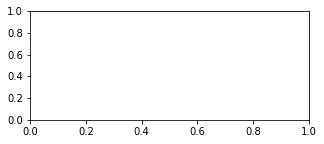

In [44]:
df.index
 # Draw line plot
fig,ax=plt.subplots(figsize=(5,2))
x=df.index
ax.plot(x,y)
#plt.plot(df['date'], df['value'])
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

In [35]:
df = df.set_index('date')

df.index = pd.to_datetime(df.index)
df['year']=df.index.year
df['month']=df.index.month
barChart=df.groupby(['year', 'month'],)['value'].mean()
barChart=barChart.unstack()



fig=barChart.plot.bar(legend=True, figsize=(12,5),ylabel='Average Page Views',xlabel='Years')


plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title = 'Months')
#fig.savefig('bar_plot.png') 

KeyError: "None of ['date'] are in the columns"

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

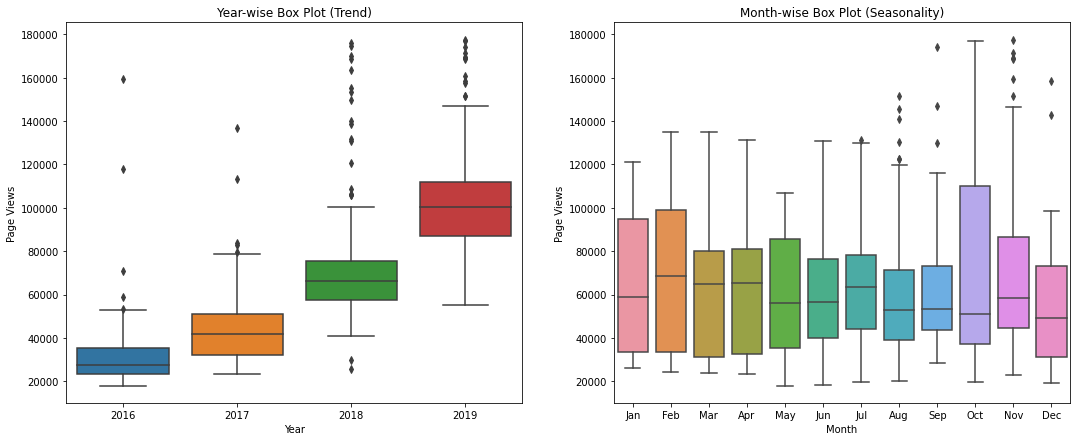

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
# Draw box plots (using Seaborn)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
fig,axis = plt.subplots(1,2)
fig.set_size_inches(18,7)
sns.boxplot(x = df_box['year'], y = df_box['value'], ax = axis[0]).set(xlabel='Year', ylabel='Page Views')
sns.boxplot(x = df_box['month'], y = df_box['value'], 
    order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec'], 
    ax = axis[1]).set(xlabel='Month', ylabel='Page Views')
axis[0].set_title('Year-wise Box Plot (Trend)')
axis[1].set_title('Month-wise Box Plot (Seasonality)')